In [1]:
# Import The Libraries 
import pandas as pd # Data preprocessing , read_data
import matplotlib.pyplot as plt # Visualization of the data
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read the Customer Personality Analysis data 
main_df = pd.read_csv("marketing_campaign.csv", sep="\t")
main_df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


### Data Cleaning

In [3]:
#Creating a copy of the dataset
df = main_df.copy()
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [4]:
corrMatrix = df.corr()
print (corrMatrix)

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.03

In [5]:
df.shape

(2240, 29)

In [6]:
df.drop('ID', axis=1,inplace=True)

In [7]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [9]:
df.isnull().sum().max()

0

In [10]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [12]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df['Age'] = 2022-df['Year_Birth']

In [14]:
df.drop('Year_Birth', axis=1, inplace=True)

In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')
df['Education'] = df['Education'].replace('Graduation','Graduate')

In [17]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','Absurd','YOLO'], 'Single')

In [19]:
df['Marital_Status']=df['Marital_Status'].replace('Married','Together')

In [20]:
df['Marital_Status'].unique()

array(['Single', 'Together'], dtype=object)

In [21]:
df['children'] = df['Kidhome']+df['Teenhome']

In [22]:
df.drop(['Kidhome','Teenhome'],axis=1, inplace=True)

In [23]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,children
0,Graduate,Single,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,65,0
1,Graduate,Single,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,68,2
2,Graduate,Together,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,57,0
3,Graduate,Together,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,38,1
4,PhD,Together,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,41,1


In [24]:
df['Yr_Customer_enroled']=pd.DatetimeIndex(df['Dt_Customer']).year

In [25]:
df['Yr_Customer_enroled'] = 2022-df['Yr_Customer_enroled']

In [26]:
df.drop('Dt_Customer',axis=1,inplace=True)

In [27]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,children,Yr_Customer_enroled
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,3,11,1,65,0,10
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,3,11,0,68,2,8
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,3,11,0,57,0,9
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,3,11,0,38,1,8
4,PhD,Together,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,3,11,0,41,1,8


In [28]:
df["Spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [29]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [30]:
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,children,Yr_Customer_enroled,Spent
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,3,11,1,65,0,10,1617
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,3,11,0,68,2,8,27
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,3,11,0,57,0,9,776
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,3,11,0,38,1,8,53
4,PhD,Together,58293.0,94,173,43,118,46,27,15,...,0,0,0,3,11,0,41,1,8,422


In [31]:
df.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

(array([1.678e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
        400691.6, 467185.2, 533678.8, 600172.4, 666666. ]),
 <BarContainer object of 10 artists>)

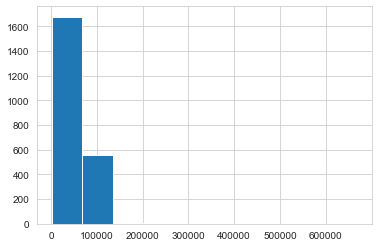

In [32]:
plt.hist(df['Income'])

In [33]:
len(df[df['Income']>120000])

8

In [34]:
df = df[df['Income']<120000]

(array([ 37., 185., 333., 399., 375., 367., 331., 174.,  28.,   3.]),
 array([  1730. ,  12930.4,  24130.8,  35331.2,  46531.6,  57732. ,
         68932.4,  80132.8,  91333.2, 102533.6, 113734. ]),
 <BarContainer object of 10 artists>)

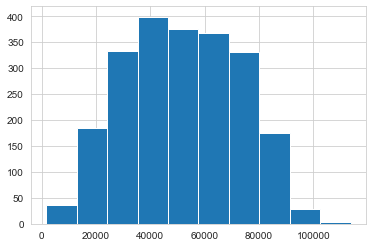

In [35]:
plt.hist(df['Income'])

In [36]:
df.shape

(2232, 26)

(array([189., 502., 682., 541., 299.,  16.,   0.,   0.,   0.,   3.]),
 array([ 26. ,  36.3,  46.6,  56.9,  67.2,  77.5,  87.8,  98.1, 108.4,
        118.7, 129. ]),
 <BarContainer object of 10 artists>)

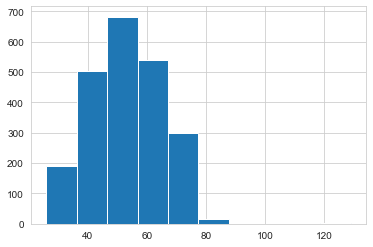

In [37]:
plt.hist(df['Age'])

In [38]:
df = df[(df["Age"]<90)]

In [39]:
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,children,Yr_Customer_enroled,Spent
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,65,0,10,1617
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,68,2,8,27
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,57,0,9,776
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,38,1,8,53
4,PhD,Together,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,41,1,8,422


In [40]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [41]:
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Complain','Response'], axis=1, inplace=True)

In [42]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']+df['NumWebVisitsMonth']

In [43]:
df.drop(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','NumWebVisitsMonth'], axis=1, inplace=True)

In [44]:
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,children,Yr_Customer_enroled,Spent,TotalAcceptedCmp,NumTotalPurchases
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,65,0,10,1617,1,32
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,68,2,8,27,0,11
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,57,0,9,776,0,25
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,38,1,8,53,0,14
4,PhD,Together,58293.0,94,173,43,118,46,27,15,41,1,8,422,0,24


In [45]:
del df['Recency']

In [46]:
df['Education'].unique()

array(['Graduate', 'PhD', 'Master', 'Basic'], dtype=object)

In [47]:
df['Education'] = df['Education'].replace({'Basic':0,'Graduate':1,'Master':2,'PhD':3})

In [48]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single':0,'Together':1})

In [49]:
df.head()

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,children,Yr_Customer_enroled,Spent,TotalAcceptedCmp,NumTotalPurchases
0,1,0,58138.0,635,88,546,172,88,88,65,0,10,1617,1,32
1,1,0,46344.0,11,1,6,2,1,6,68,2,8,27,0,11
2,1,1,71613.0,426,49,127,111,21,42,57,0,9,776,0,25
3,1,1,26646.0,11,4,20,10,3,5,38,1,8,53,0,14
4,3,1,58293.0,173,43,118,46,27,15,41,1,8,422,0,24


In [50]:
corrMatrix = df.corr()
print (corrMatrix)

                     Education  Marital_Status    Income     Wines    Fruits  \
Education             1.000000        0.003151  0.121845  0.164552 -0.087460   
Marital_Status        0.003151        1.000000 -0.012317 -0.006189 -0.025400   
Income                0.121845       -0.012317  1.000000  0.728169  0.535305   
Wines                 0.164552       -0.006189  0.728169  1.000000  0.387591   
Fruits               -0.087460       -0.025400  0.535305  0.387591  1.000000   
Meat                  0.001242       -0.028011  0.693762  0.586156  0.562744   
Fish                 -0.091222       -0.017265  0.550047  0.398024  0.593941   
Sweets               -0.084135       -0.019407  0.549804  0.384885  0.566545   
Gold                 -0.114614       -0.029930  0.412553  0.384979  0.389145   
Age                   0.139957        0.001459  0.211432  0.162628  0.013360   
children              0.044788        0.039804 -0.347199 -0.354055 -0.395893   
Yr_Customer_enroled  -0.038705       -0.

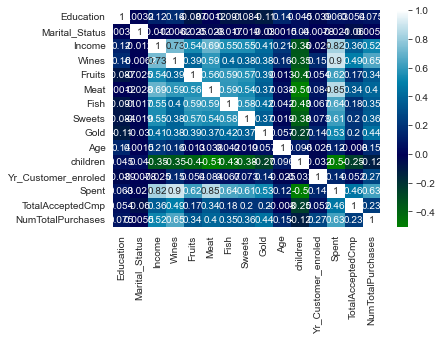

In [51]:
sns.heatmap(corrMatrix, annot=True , cmap = 'ocean' )
plt.show()

In [52]:
#Normalize The Data before apply PCA
# scaled_df= StandardScaler().fit_transform(df)
# scaled_df = pd.DataFrame(scaled_df)


scaled_df = Normalizer()
scaled_df = scaled_df.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)

In [53]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000017,0.000000,0.999501,0.010917,0.001513,0.009387,0.002957,0.001513,0.001513,0.001117,0.000000,0.000172,0.027799,0.000017,0.000550
1,0.000022,0.000000,0.999999,0.000237,0.000022,0.000129,0.000043,0.000022,0.000129,0.001467,0.000043,0.000173,0.000583,0.000000,0.000237
2,0.000014,0.000014,0.999920,0.005948,0.000684,0.001773,0.001550,0.000293,0.000586,0.000796,0.000000,0.000126,0.010835,0.000000,0.000349
3,0.000038,0.000038,0.999996,0.000413,0.000150,0.000751,0.000375,0.000113,0.000188,0.001426,0.000038,0.000300,0.001989,0.000000,0.000525
4,0.000051,0.000017,0.999966,0.002968,0.000738,0.002024,0.000789,0.000463,0.000257,0.000703,0.000017,0.000137,0.007239,0.000000,0.000412


In [54]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [55]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.86311616, 0.97064143, 0.98754752, 0.99394911, 0.99714688,
       0.99873677, 0.99934587, 0.99983379, 0.99998387, 0.99999534,
       0.99999747, 0.9999986 , 0.99999937, 1.        , 1.        ])

Text(0, 0.5, 'cumculative explained variance')

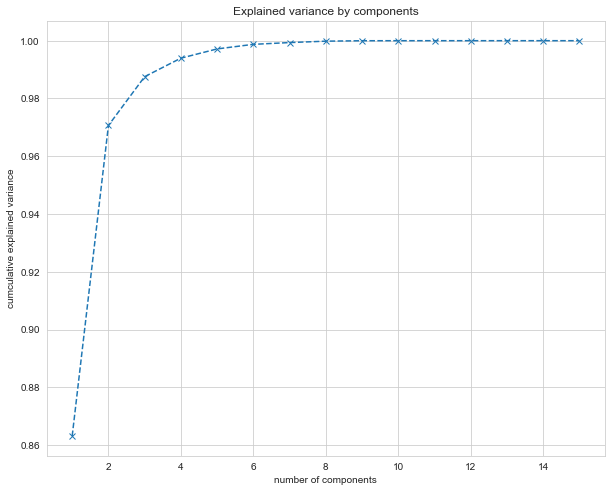

In [56]:
plt.figure(figsize=(10,8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker='x', linestyle="--")
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumculative explained variance')

In [57]:
pca6 = PCA(n_components=3)

In [58]:
pca6.fit(scaled_df)

PCA(n_components=3)

In [59]:
score_pca6 = pca6.transform(scaled_df)

In [60]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(score_pca6)
    wcss.append(kmeans_pca.inertia_)

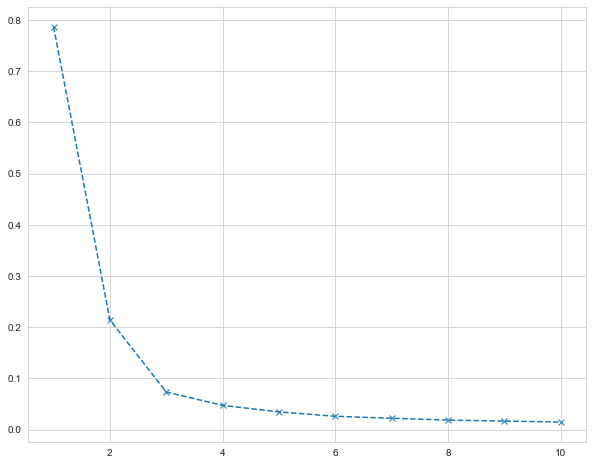

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='x', linestyle='--')

In [62]:
kmeans_pca = KMeans(n_clusters= 3, init='k-means++', random_state= 20)

In [63]:
kmeans_pca.fit_transform(score_pca6)

array([[0.02670796, 0.74037609, 0.01077231],
       [0.0039957 , 0.76420735, 0.02021658],
       [0.00797244, 0.75645522, 0.0084237 ],
       ...,
       [0.02276429, 0.74812675, 0.00763188],
       [0.00944096, 0.75471268, 0.00680484],
       [0.00093011, 0.7617911 , 0.01706173]])

In [64]:
metrics.silhouette_score(score_pca6,kmeans_pca.labels_)

0.6019587886755335

In [65]:
Agg3 = AgglomerativeClustering(n_clusters=3).fit(score_pca6)

In [66]:
Agg3 = AgglomerativeClustering(n_clusters=2).fit(score_pca6)

Text(0, 0.5, 'Distance')

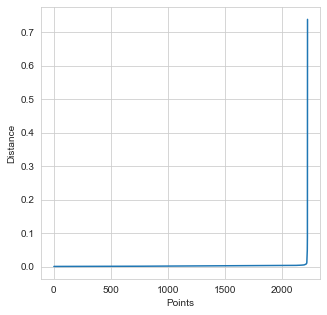

In [67]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaled_df)

distances, indices = neighbors.kneighbors(scaled_df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [68]:
db3 = DBSCAN(eps= 0.3, min_samples = 18).fit(score_pca6).labels_

In [69]:
db3 = DBSCAN(eps= 0.2 , min_samples = 5).fit(score_pca6).labels_

In [70]:
gmm = GaussianMixture(n_components=2).fit(score_pca6)
labels = gmm.predict(score_pca6)

In [71]:
metrics.silhouette_score(score_pca6,labels)

0.984934333191665